<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [2]:
# Something new to install...
#! pip install plotly

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [5]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [6]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [8]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [9]:
# Filter Data to Most Recent Year
df_filter = df[df['year'] == df['year'].max()]
df_filter

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.82800,31889923,974.58034,AFG,4
23,Albania,Europe,2007,76.42300,3600523,5937.02953,ALB,8
35,Algeria,Africa,2007,72.30100,33333216,6223.36747,DZA,12
47,Angola,Africa,2007,42.73100,12420476,4797.23127,AGO,24
59,Argentina,Americas,2007,75.32000,40301927,12779.37964,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.24900,85262356,2441.57640,VNM,704
1667,West Bank and Gaza,Asia,2007,73.42200,4018332,3025.34980,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.69800,22211743,2280.76991,YEM,887
1691,Zambia,Africa,2007,42.38400,11746035,1271.21159,ZMB,894


In [10]:
# Set Country to Index
df_filter.set_index('country', inplace=True)

In [11]:
# Drop `iso_alpha`, `year`, and `iso_num`
df_clean=df_filter.drop(columns=['iso_alpha', 'year', 'iso_num'])

In [12]:
df_clean

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.82800,31889923,974.58034
Albania,Europe,76.42300,3600523,5937.02953
Algeria,Africa,72.30100,33333216,6223.36747
Angola,Africa,42.73100,12420476,4797.23127
Argentina,Americas,75.32000,40301927,12779.37964
...,...,...,...,...
Vietnam,Asia,74.24900,85262356,2441.57640
West Bank and Gaza,Asia,73.42200,4018332,3025.34980
"Yemen, Rep.",Asia,62.69800,22211743,2280.76991


In [13]:
print(df_clean.columns)

Index(['continent', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [14]:
# How many countries in each continent? 
countries_per_continent = df_clean.groupby('continent').size()
countries_per_continent

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
dtype: int64

In [15]:
# Get dummies!
df_dummies=pd.get_dummies(df_clean, columns=['continent'], drop_first=False)

In [16]:
# Head (again!)

df_dummies.head()

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,False,False,True,False,False
Albania,76.42300,3600523,5937.02953,False,False,False,True,False
Algeria,72.30100,33333216,6223.36747,True,False,False,False,False
Angola,42.73100,12420476,4797.23127,True,False,False,False,False
Argentina,75.32000,40301927,12779.37964,False,True,False,False,False


In [17]:
# Define X

X = df_dummies.drop(columns=['lifeExp']) 

In [18]:
print(X.head())

                  pop   gdpPercap  continent_Africa  continent_Americas  \
country                                                                   
Afghanistan  31889923   974.58034             False               False   
Albania       3600523  5937.02953             False               False   
Algeria      33333216  6223.36747              True               False   
Angola       12420476  4797.23127              True               False   
Argentina    40301927 12779.37964             False                True   

             continent_Asia  continent_Europe  continent_Oceania  
country                                                           
Afghanistan            True             False              False  
Albania               False              True              False  
Algeria               False             False              False  
Angola                False             False              False  
Argentina             False             False              False  


In [19]:
# Scale Features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### II. K-Means Clustering Model

In [21]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42) # Create model
    kmeans.fit(X_scaled)                           # Fit to scaled data
    inertia_list.append(kmeans.inertia_)          # Store inertia score

# Returns list of inertia scores for each k
# Use to find "elbow" point where adding clusters gives diminishing returns
inertia_list

[994.0000000000001,
 768.7399713196764,
 579.4563722818282,
 359.8553454071143,
 213.31351868979192,
 93.475268512507,
 74.02998110048043,
 42.40359701269874,
 29.81835621679816,
 27.84685558540989,
 23.34884540234232,
 21.558378335679322,
 18.250609693427048,
 17.229021454991972,
 15.072844843522088,
 13.820324383645177,
 11.34357658682481,
 9.899555005937458,
 8.519358471509822,
 7.530196167573207]

In [22]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):

   kmeans = KMeans(n_clusters=k, random_state=42)      # Create model
   kmeans.fit(X_scaled)                                # Fit to scaled data
   silhouette_list.append(                             # Store score
       silhouette_score(X_scaled, kmeans.labels_))

# Returns list of silhouette scores (-1 to 1)
# Higher score = better separated clusters
silhouette_list

[0.39097471544303847,
 0.4998159480318514,
 0.6897008272089893,
 0.7279420795486762,
 0.7641197051141423,
 0.7489868387820195,
 0.7635675388242952,
 0.7641080365539937,
 0.7013943769306658,
 0.6980827357366971,
 0.6954577699070656,
 0.6148943790408057,
 0.6034208421262103,
 0.5725604415459676,
 0.5267084294264541,
 0.5541377509820158,
 0.5663043149770262,
 0.567718993478866,
 0.5711185361076178]

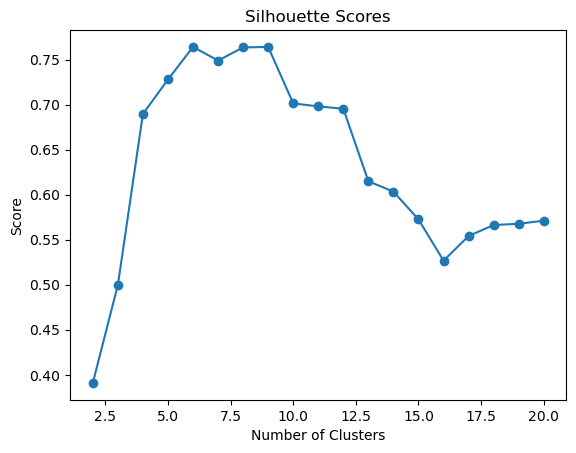

In [23]:
# Plot silhouette scores for different k values
plt.plot(range(2,21),          # x-axis: k from 2-21
        silhouette_list,      # y-axis: silhouette scores
        marker='o')           # Add points at each score

plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Silhouette Scores")
plt.show()

# Find optimal k where silhouette score peaks
# Higher score = better separated clusters
# Scores range -1 to 1
# Compare cluster quality across different k values

#### Based off of our metrics above, which k should we try first?

In [25]:
 #0.7641197051141423 (5)

Answer Here:
K = 6 
The highest value in the list is 0.7641197051141423.

In [27]:
# Now let's try it!

# Instantiate & Fit
#
km = KMeans(n_clusters=6, random_state=42)
km.fit(X_scaled)


KMeans(n_clusters=6, random_state=42)

In [28]:
# Silhouette Score
silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

In [29]:
silhouette_list

[0.39097471544303847,
 0.4998159480318514,
 0.6897008272089893,
 0.7279420795486762,
 0.7641197051141423,
 0.7489868387820195,
 0.7635675388242952,
 0.7641080365539937,
 0.7013943769306658,
 0.6980827357366971,
 0.6954577699070656,
 0.6148943790408057,
 0.6034208421262103,
 0.5725604415459676,
 0.5267084294264541,
 0.5541377509820158,
 0.5663043149770262,
 0.567718993478866,
 0.5711185361076178,
 0.5711185361076178]

#### Visualize Your Clusters!

In [31]:
# Add cluster column
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled) 

X_scaled = pd.DataFrame(X_scaled)  # Replace with your feature names

X_scaled['cluster'] = clusters
X_scaled

,0,1,2,3,4,5,6,cluster
0,-0.08247,-0.83542,-0.76012,-0.46225,1.81742,-0.51755,-0.11952,3
1,-0.27478,-0.44816,-0.76012,-0.46225,-0.55023,1.93218,-0.11952,1
2,-0.07266,-0.42582,1.31559,-0.46225,-0.55023,-0.51755,-0.11952,2
3,-0.21482,-0.53711,1.31559,-0.46225,-0.55023,-0.51755,-0.11952,2
4,-0.02528,0.08579,-0.76012,2.16333,-0.55023,-0.51755,-0.11952,0
...,...,...,...,...,...,...,...,...
137,0.28036,-0.72094,-0.76012,-0.46225,1.81742,-0.51755,-0.11952,3
138,-0.27194,-0.67538,-0.76012,-0.46225,1.81742,-0.51755,-0.11952,3
139,-0.14826,-0.73349,-0.76012,-0.46225,1.81742,-0.51755,-0.11952,3
140,-0.21941,-0.81227,1.31559,-0.46225,-0.55023,-0.51755,-0.11952,2


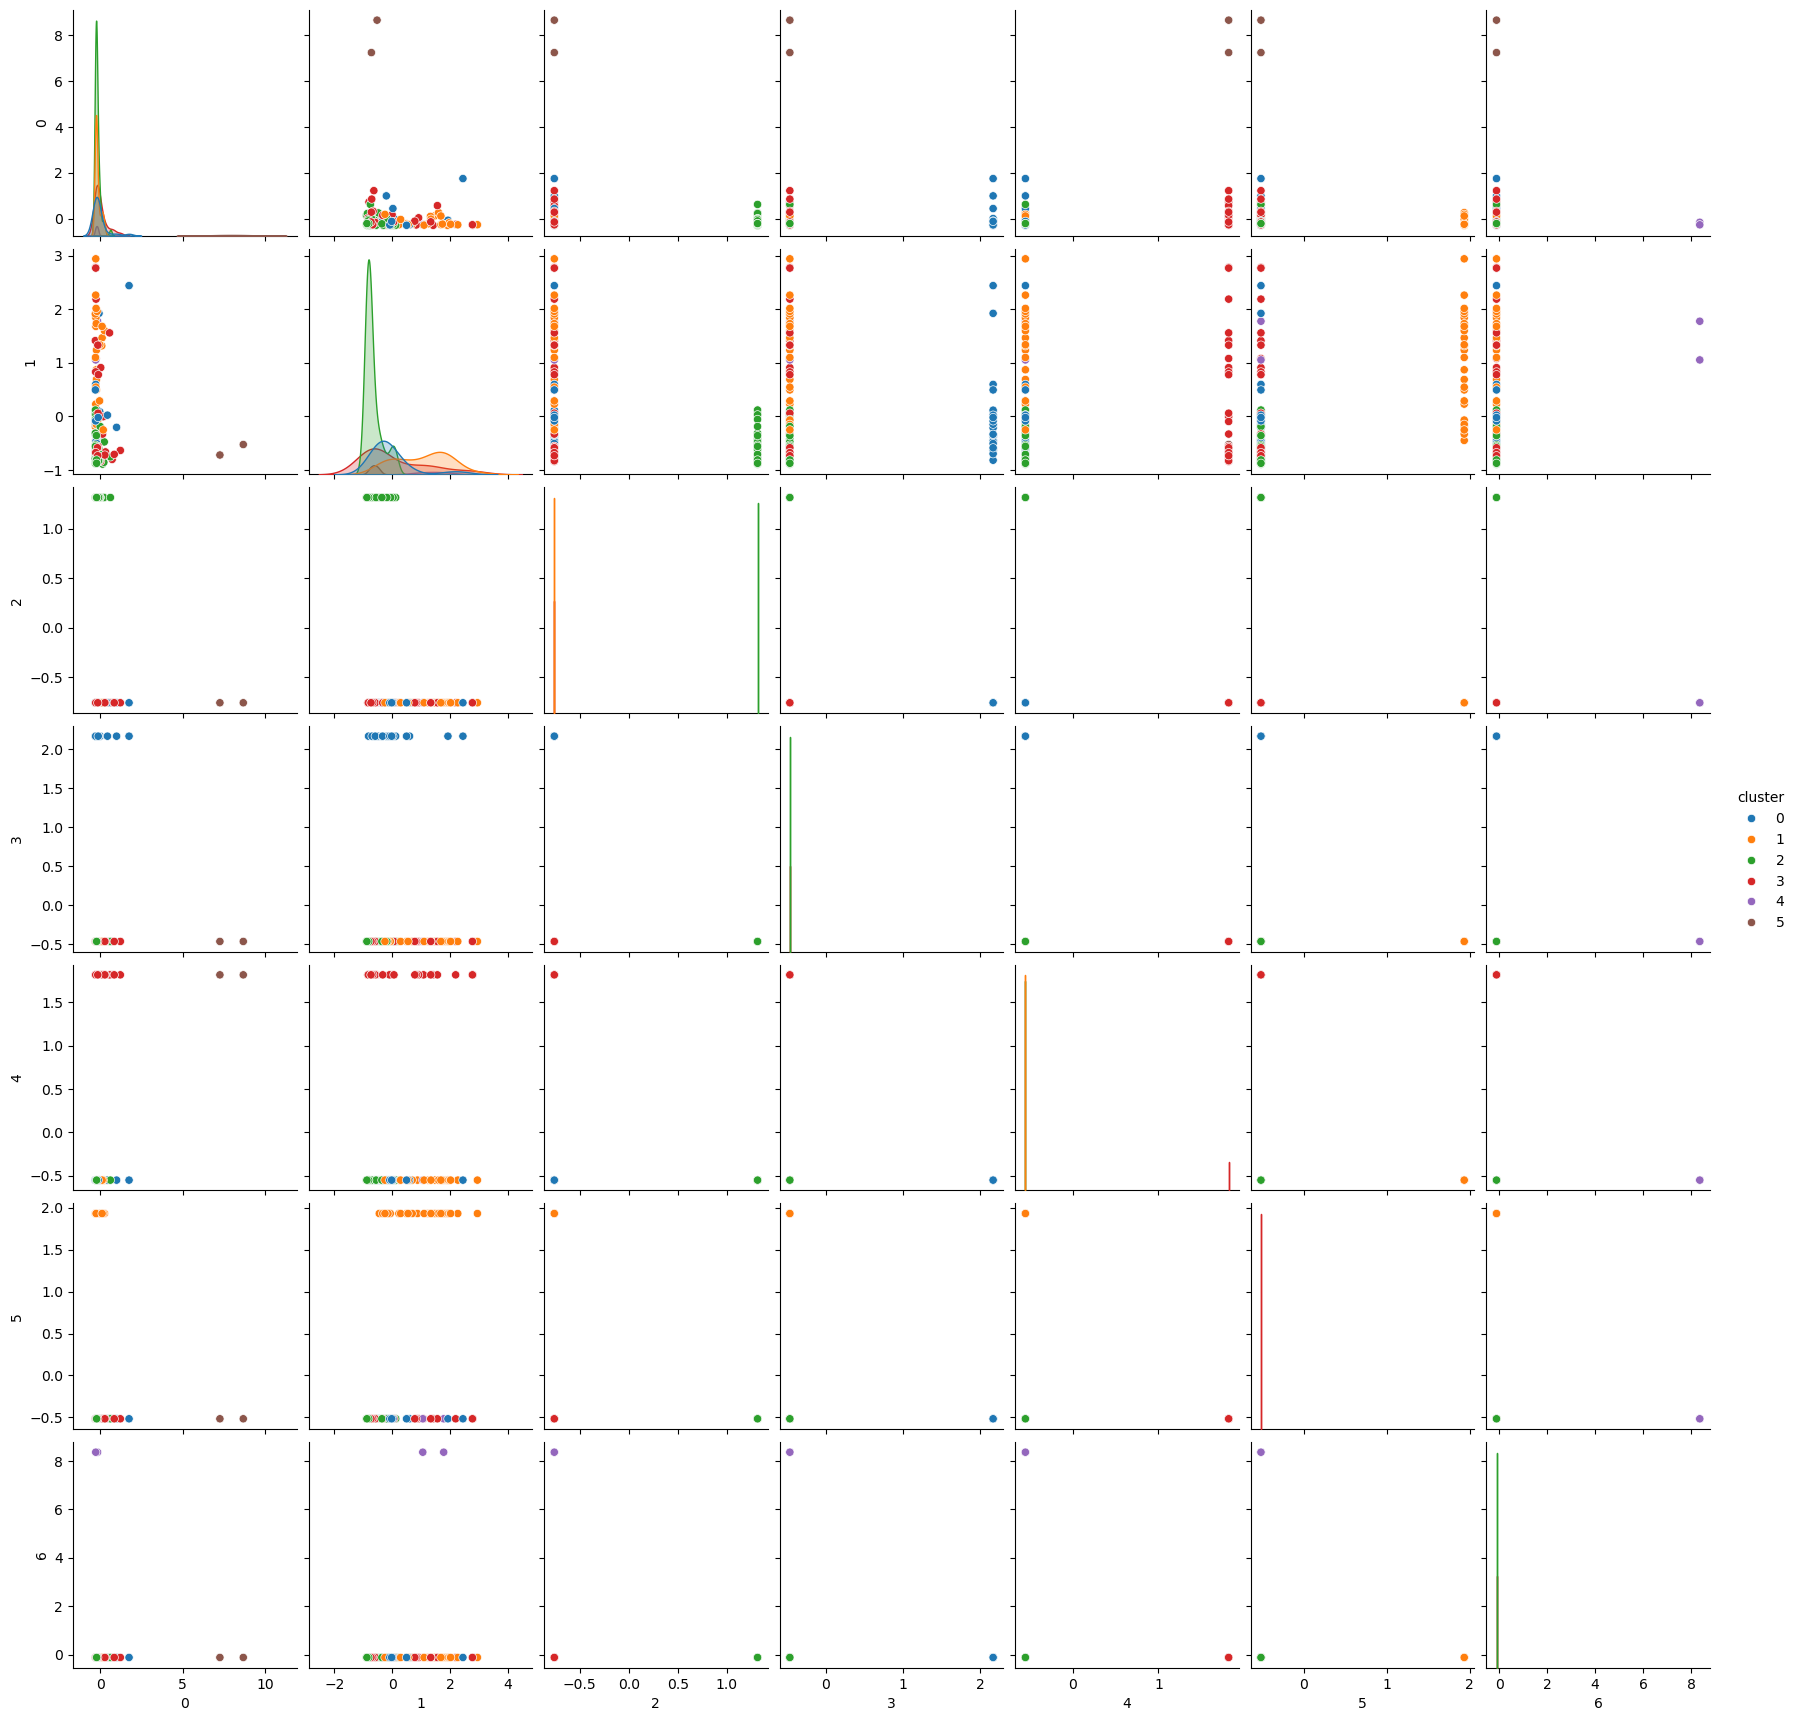

In [32]:
# Method 1: Pairplots/Scatterplots

sns.pairplot(X_scaled, hue='cluster', palette='tab10', diag_kind='kde')
plt.show()

In [33]:
# Method 2: Groupby

cluster_mean = X_scaled.groupby('cluster').size()
cluster_mean

cluster
0    25
1    30
2    52
3    31
4     2
5     2
dtype: int64

#### An Even Closer Look...Which countries are in each of these clusters?

In [35]:
df_clean['cluster'] = clusters
df_clean

,continent,lifeExp,pop,gdpPercap,cluster
country,,,,,
Afghanistan,Asia,43.82800,31889923,974.58034,3
Albania,Europe,76.42300,3600523,5937.02953,1
Algeria,Africa,72.30100,33333216,6223.36747,2
Angola,Africa,42.73100,12420476,4797.23127,2
Argentina,Americas,75.32000,40301927,12779.37964,0
...,...,...,...,...,...
Vietnam,Asia,74.24900,85262356,2441.57640,3
West Bank and Gaza,Asia,73.42200,4018332,3025.34980,3
"Yemen, Rep.",Asia,62.69800,22211743,2280.76991,3


In [36]:
# For loop
cout_by_cluster = df_clean.groupby('cluster',group_keys=False).apply(lambda x: x.index.tolist())
for cluster, countries in cout_by_cluster.items():
    print(f"Cluster {cluster}:")
    print(", ".join(countries))
    print("-" *100)


Cluster 0:
Argentina, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Cuba, Dominican Republic, Ecuador, El Salvador, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Puerto Rico, Trinidad and Tobago, United States, Uruguay, Venezuela
----------------------------------------------------------------------------------------------------
Cluster 1:
Albania, Austria, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom
----------------------------------------------------------------------------------------------------
Cluster 2:
Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Egypt, Equatorial Guinea, Eritr

/var/folders/zy/rzr3n79j0mb4zk8gxww6xsd40000gn/T/ipykernel_40752/3592110959.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cout_by_cluster = df_clean.groupby('cluster',group_keys=False).apply(lambda x: x.index.tolist())


### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [38]:
df_clean.keys()

Index(['continent', 'lifeExp', 'pop', 'gdpPercap', 'cluster'], dtype='object')

In [39]:
df_clean.head()

,continent,lifeExp,pop,gdpPercap,cluster
country,,,,,
Afghanistan,Asia,43.82800,31889923,974.58034,3
Albania,Europe,76.42300,3600523,5937.02953,1
Algeria,Africa,72.30100,33333216,6223.36747,2
Angola,Africa,42.73100,12420476,4797.23127,2
Argentina,Americas,75.32000,40301927,12779.37964,0


In [40]:
df_clean.ndim

2

In [41]:
sc = StandardScaler()
X_DB = sc.fit_transform(X)

In [42]:

print(X_DB.mean())


print(X_DB.std())

2.5912650071734036e-17
1.0


In [43]:
# Create and fit DBSCAN model
dbscan = DBSCAN(
   eps=3.0,           
   min_samples=2)   


dbscan.fit(X_DB)   # Fit on scaled data
#DBSCAN(eps=3.0, min_samples=2)

DBSCAN(eps=3.0, min_samples=2)

In [44]:
pd.Series(dbscan.labels_).value_counts()

2    52
0    31
1    30
3    25
4     2
5     2
Name: count, dtype: int64

In [45]:
len(dbscan.labels_)

142

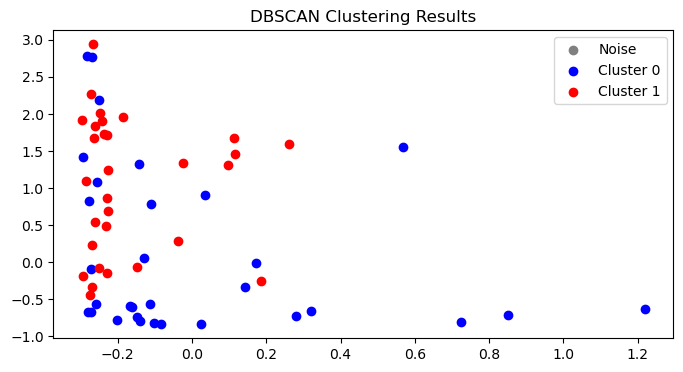

In [46]:
plt.figure(figsize=(8,4))

colors = {-1:'gray', 0: 'blue', 1: 'red'} # Color map for each label
labels = {-1: 'Noise', 0: 'Cluster 0', 1: 'Cluster 1'} # Legend labels


for label, color in colors.items():
    mask = dbscan.labels_ == label
    plt.scatter(X_DB[mask, 0], X_DB[mask, 1], c=color, label=labels[label])

plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

In [47]:
# Silhouette Score
silhouette_score(X_scaled, dbscan.labels_)

0.7787720821242083

In [48]:
#DBSCAN(eps=3.0, min_samples=2) is better than KMean at 6


In [56]:
dbscan_cluster = df_clean.groupby('cluster').apply(lambda x: x.index.tolist())

# Display countries for each DBSCAN cluster
for cluster, countries in dbscan_cluster.items():
    print(f"DBSCAN Cluster {cluster}: {countries}")

DBSCAN Cluster 0: ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']
DBSCAN Cluster 1: ['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
DBSCAN Cluster 2: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia

/var/folders/zy/rzr3n79j0mb4zk8gxww6xsd40000gn/T/ipykernel_40752/2824722892.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dbscan_cluster = df_clean.groupby('cluster').apply(lambda x: x.index.tolist())


### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 